<a href="https://colab.research.google.com/github/Jaspreet117/Minor-Project/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 229 µs (started: 2021-05-21 19:01:42 +00:00)


In [3]:
# Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

time: 702 ms (started: 2021-05-21 19:01:42 +00:00)


In [4]:
DATADIR = '/content/drive/MyDrive/Minor Project/images'
CATEGORIES = ['Bicycle','Fresh Lemon','White Lily']

target = []
images = []
flat_data = []

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)     # Label Encoding the values
  path = os.path.join(DATADIR,category)      # Create path to use all the images
  print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    #plt.show()
    img_resized = resize(img_array,(150,150,3))   # Noramlizes the value from 0-1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

/content/drive/MyDrive/Minor Project/images/Bicycle
/content/drive/MyDrive/Minor Project/images/Fresh Lemon
/content/drive/MyDrive/Minor Project/images/White Lily
time: 19.6 s (started: 2021-05-21 19:01:43 +00:00)


In [5]:
len(flat_data[0])

67500

time: 7.21 ms (started: 2021-05-21 19:02:02 +00:00)


In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

time: 7.95 ms (started: 2021-05-21 19:02:02 +00:00)


<BarContainer object of 3 artists>

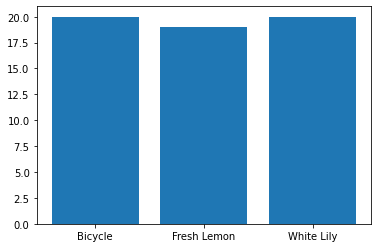

time: 178 ms (started: 2021-05-21 19:02:02 +00:00)


In [7]:
unique,count = np.unique(target,return_counts= True)
plt.bar(CATEGORIES,count)

In [8]:
# Split Data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)

time: 144 ms (started: 2021-05-21 19:02:03 +00:00)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 47.1 s (started: 2021-05-21 19:02:03 +00:00)


In [10]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1])

time: 65.2 ms (started: 2021-05-21 19:02:50 +00:00)


In [11]:
y_test

array([1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1])

time: 7.44 ms (started: 2021-05-21 19:02:50 +00:00)


In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.24 ms (started: 2021-05-21 19:02:50 +00:00)


In [13]:
accuracy_score(y_pred,y_test)

0.9444444444444444

time: 8.49 ms (started: 2021-05-21 19:02:50 +00:00)


In [14]:
confusion_matrix(y_pred,y_test)

array([[ 5,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  2]])

time: 8.28 ms (started: 2021-05-21 19:02:50 +00:00)


In [15]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 26.8 ms (started: 2021-05-21 19:02:50 +00:00)


In [16]:
model = pickle.load(open('img_model.p','rb'))

time: 20.8 ms (started: 2021-05-21 19:02:50 +00:00)


Enter your URLhttps://images-na.ssl-images-amazon.com/images/I/41O3LKuzEOL._SX466_.jpg
(417, 466, 3)
 PREDICTED OUTPUT: White Lily


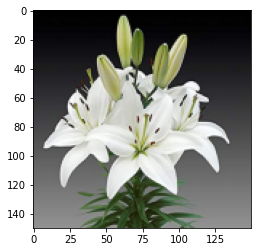

time: 53.8 s (started: 2021-05-21 19:02:50 +00:00)


In [17]:
# Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')